# Sequence to Sequence Chatbot

In this notebook, I first train a  Sequence to Sequence text generation architecture based chatbot on a subset of  torchtext's SQuAD 1.0 dataset which consists of question-answer-pairs. Subsequently, I confront the trained model with both questions it has been exposed to and questions it has not been exposed to demonstrate the way the model works.

### dependencies:

# LSTM Bot

## Project Overview

In this project, you will build a chatbot that can converse with you at the command line. The chatbot will use a Sequence to Sequence text generation architecture with an LSTM as it's memory unit. You will also learn to use pretrained word embeddings to improve the performance of the model. At the conclusion of the project, you will be able to show your chatbot to potential employers.

Additionally, you have the option to use pretrained word embeddings in your model. We have loaded Brown Embeddings from Gensim in the starter code below. You can compare the performance of your model with pre-trained embeddings against a model without the embeddings.



---



A sequence to sequence model (Seq2Seq) has two components:
- An Encoder consisting of an embedding layer and LSTM unit.
- A Decoder consisting of an embedding layer, LSTM unit, and linear output unit.

The Seq2Seq model works by accepting an input into the Encoder, passing the hidden state from the Encoder to the Decoder, which the Decoder uses to output a series of token predictions.

## Dependencies

- Pytorch
- Numpy
- Pandas
- NLTK
- Gzip
- Gensim


Please choose a dataset from the Torchtext website. We recommend looking at the Squad dataset first. Here is a link to the website where you can view your options:

- https://pytorch.org/text/stable/datasets.html





In [1]:

from src.data_chatbot import questions_answers, load_df, toTensor, show_lengths, vectorize_questions, vectorize_answers
from src.data_chatbot import prepare_text
from src.models_chatbot import Seq2Seq
from src.vocab_chatbot import Vocab


from src.train_chatbot import pretrain, train
from src.apply_chatbot import apply_chatbot



C:\Users\Adam\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
C:\Users\Adam\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org

### Tests

In [2]:
!python -m pytest -vv src/tests_chatbot.py

============================= test session starts =============================
platform win32 -- Python 3.7.3, pytest-4.3.1, py-1.8.0, pluggy-0.9.0 -- C:\Users\Adam\Anaconda3\python.exe
cachedir: .pytest_cache
rootdir: C:\Users\Adam\Desktop\Udacity\DL-Generative-Chatbot, inifile:
plugins: remotedata-0.3.1, openfiles-0.3.2, doctestplus-0.3.0, arraydiff-0.3
collecting ... collected 1 item

src/tests_chatbot.py::test_seq2seq_forward PASSED                        [100%]

========================== 1 passed in 3.06 seconds ===========================


### Inspect raw data

In [3]:
df_train = load_df()
df_train.head()

,Question,Answer
0,To whom did the Virgin Mary allegedly appear i...,Saint Bernadette Soubirous
1,What is in front of the Notre Dame Main Building?,a copper statue of Christ
2,The Basilica of the Sacred heart at Notre Dame...,the Main Building
3,What is the Grotto at Notre Dame?,a Marian place of prayer and reflection
4,What sits on top of the Main Building at Notre...,a golden statue of the Virgin Mary


### Tokenize data

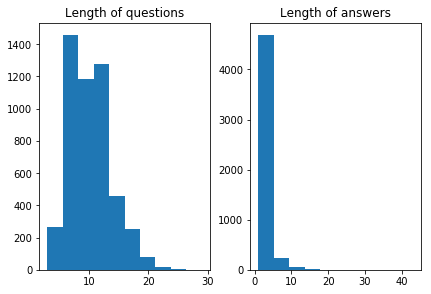

In [4]:
questions, answers = questions_answers(5000)
show_lengths(questions, answers)

### Create vocabularies

In [5]:
vQ = Vocab("Questions")
for sequence in [["<SOS>", "<EOS>"]] + questions:
    for token in sequence:
        vQ.indexWord(token)
vA = Vocab("Answers")
for sequence in [["<SOS>", "<EOS>"]] + answers:
    for token in sequence:
        vA.indexWord(token)
print(f"The source vocabulary contains {len(vQ.word2index)} and the target vocabulary contains {len(vA.word2index)} words.")

The source vocabulary contains 4513 and the target vocabulary contains 4074 words.


### Create vectors

In [6]:
vectorized_questions = vectorize_questions(questions, vQ)
vectorized_answers = vectorize_answers(answers, vA)
print('Vectorization completed.')


Tokenization completed.


### Create model

In [7]:
input_size = len(vQ.word2index)
hidden_size = 124
output_size = len(vA.word2index) 

dropout_E=0.0
dropout_D=0.0
teacher_forcing_ratio=0.0


model = Seq2Seq(input_size, hidden_size, output_size)

### Train model

In [8]:
epochs = 30
batch_size = 124
print_each = 1
lr = 0.01
weight_decay = 0
version = str(hidden_size)
train(epochs, batch_size, print_each, lr, model, version, vectorized_questions, vectorized_answers, vQ, vA)

Nothing to load at checkpoint: 'model_124.pt'
Computing on cpu.

epoch: 1/30 	train_loss: 6.053 	valid_loss 6.394
question: <SOS> in what decad did the crime rate drop significantli <EOS> 
answer: 1990 <EOS> 
prediction: the <EOS>  

epoch: 2/30 	train_loss: 5.452 	valid_loss 7.204
question: <SOS> how much of the market did ipod claim as of januari 2007 <EOS> 
answer: 727 <EOS> 
prediction: the the  

epoch: 3/30 	train_loss: 5.291 	valid_loss 6.945
question: <SOS> who wa the notr dame presid that preced john jenkin <EOS> 
answer: malloy <EOS> 
prediction: the new  

epoch: 4/30 	train_loss: 5.17 	valid_loss 7.344
question: <SOS> what is a worri of use phage <EOS> 
answer: phage will infect good bacteria <EOS> 
prediction: the ming of the ming of  

epoch: 5/30 	train_loss: 5.053 	valid_loss 7.702
question: <SOS> beyonc open a cosmetolog center in what locat <EOS> 
answer: brooklyn phoenix hous <EOS> 
prediction: the new york citi  

epoch: 6/30 	train_loss: 4.907 	valid_loss 8.218
que

### Apply model

In [12]:
import torch
version = 124
model.load_state_dict(torch.load(f"model_{version}.pt", map_location=torch.device('cpu')))
print(f"Loading from checkpoint: 'model_{version}.pt'")


max_count = 0
for answer in answers:
    if len(answer) > max_count:
        max_count = len(answer)

model.eval()
string2stop = 'quit'
print(f"Type {string2stop} to finish the chat.\n")

    
while (True):
    question = input("> ")
    if question.strip() == string2stop:
        break
    
    apply_chatbot(model, vectorize_questions([prepare_text(question)],vQ)[0].view(-1,1), vQ, vA, max_count)

Loading from checkpoint: 'model_124.pt'
Type quit to finish the chat.

> What is in front of the Notre Dame Main Building?	
<  a copper statu of christ <EOS>

> What is the Grotto at Notre Dame?
<  a marian place of prayer and reflect <EOS>

> And how do you deal with an unknown question?
<  four <EOS>

> And this one?
<  the mr carter show <EOS>

> quit
